Simple Food Recognition Program

Using VGG19 for Image Classification

By: Ismail Abu Saiid

In [3]:
#Importing required packages
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
#Loading images
train_path="input/train"
test_path="input/test"
val_path="input/val"


x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [5]:
# x_train,x_test, and x_val divided by 255.0 for normalization
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
#Compute the labels of the corresponding datasets using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 4,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'sparse')

train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

training_set.class_indices

train_y.shape,test_y.shape,val_y.shape

Found 256 images belonging to 4 classes.
Found 80 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


((256,), (80,), (64,))

In [8]:
#Model Building using VGG-19 pre-trained model
IMAGE_SIZE = [224, 224] #Default image size for VGG16
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)

In [9]:
#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
#Compiling the model
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [12]:
#Fitting the model

from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=10,
  callbacks=[early_stop],
  batch_size=32,shuffle=True)

Epoch 1/10


8/8 [==============================] - 26s 3s/step - loss: 1.8563 - accuracy: 0.4258 - val_loss: 0.6452 - val_accuracy: 0.7031
Epoch 2/10
8/8 [==============================] - 24s 3s/step - loss: 0.3428 - accuracy: 0.8633 - val_loss: 0.3502 - val_accuracy: 0.8594
Epoch 3/10
8/8 [==============================] - 26s 3s/step - loss: 0.1386 - accuracy: 0.9570 - val_loss: 0.3902 - val_accuracy: 0.8594
Epoch 4/10
8/8 [==============================] - 26s 3s/step - loss: 0.0607 - accuracy: 0.9805 - val_loss: 0.2787 - val_accuracy: 0.8594
Epoch 5/10
8/8 [==============================] - 26s 3s/step - loss: 0.0260 - accuracy: 0.9961 - val_loss: 0.3492 - val_accuracy: 0.8906
Epoch 6/10
8/8 [==============================] - 26s 3s/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.3839 - val_accuracy: 0.8750
Epoch 7/10
8/8 [==============================] - 26s 3s/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.8750
Epoch 8/10
8/8 [================

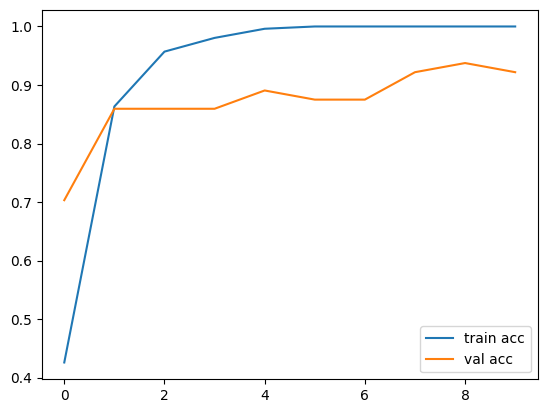

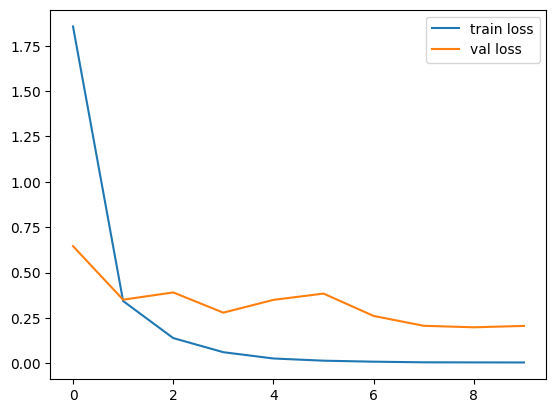

3/3 [==============================] - 7s 2s/step - loss: 0.1950 - accuracy: 0.9375


[0.19499793648719788, 0.9375]

In [13]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg-acc-rps-1.png')

plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

#Model Evaluation
model.evaluate(test_x,test_y,batch_size=32)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
print(classification_report(y_pred, test_y, target_names = ['ChickenRice (Class 1)', 'ChocolateCake (Class 2)', 'Sandwich (Class 3)', 'Spaghetti (Class 4)']))

#get confusion matrix
print("Confusion Matrix")
cf_matrix = confusion_matrix(y_pred, test_y)
print(cf_matrix)

3/3 [==============================] - 6s 2s/step
                         precision    recall  f1-score   support

  ChickenRice (Class 1)       1.00      0.83      0.91        24
ChocolateCake (Class 2)       0.90      1.00      0.95        18
     Sandwich (Class 3)       0.85      0.94      0.89        18
    Spaghetti (Class 4)       1.00      1.00      1.00        20

               accuracy                           0.94        80
              macro avg       0.94      0.94      0.94        80
           weighted avg       0.94      0.94      0.94        80

Confusion Matrix
[[20  1  3  0]
 [ 0 18  0  0]
 [ 0  1 17  0]
 [ 0  0  0 20]]


In [18]:
#SAVING MODEL
model.save('my_model.h5')

c:\Users\nox\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
